#### Use what we know about (a) reading in text files, (b) data manipulation, and (c) linear algebra to analyze the difference between these documents. Does each news site report on these stories in a similar way? Which news sites talk about the Khashoggi scandal in similar/dissimilar ways? If you change what words you remove, does the picture of similarity change?

In [39]:
import numpy as np
import pandas as pd
import numpy.linalg as la
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import re
import plotnine as ggplot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stop_words = pd.read_csv('stop_words.csv', sep=",") #Loading the stop words csv file
stopwords_list = stop_words.word.tolist()
stopwords_list[0:5]

['a', "a's", 'able', 'about', 'above']

In [3]:
#Reading the text files

with open('aljazeera-khashoggi.txt', 'r') as file: 
    aljazeera = file.read()
    
with open('bbc-khashoggi.txt', 'r') as file:
    bbc = file.read()
    
with open('breitbart-khashoggi.txt', 'r', encoding="utf8") as file:
    breitbart = file.read()
    
with open('cnn-khashoggi.txt', 'r', encoding="utf8") as file:
    cnn = file.read()
    
with open('fox-khashoggi.txt', 'r', encoding="utf8") as file:
    fox = file.read()
    
stop_words = pd.read_csv('stop_words.csv', sep=",")

In [4]:
# Basic tokenizing of text
def tokenize(text=None):
    
    '''
      This function formats text by converting to lower cases, removes full stops, stop words and gives a tokenized output
      
    '''
    text = text.lower() # convert all text to lower cases
    text = text.replace('.','') # replace full stops with empty string
    text_list = text.split() #split words by space
    text_list = [word for word in text_list if word not in stopwords_list] 
    # If word is not a stop word then we consider it for analysis
    return text_list

### Word count of articles

In [6]:
# Creating a dataframe showing the word count in each article
media_outlet = ['aljazeera', 'bbc', 'breitbart', 'cnn', 'fox']
count =[len(aljazeera_list), len(bbc_list), len(breitbart_list), len(cnn_list), len(fox_list)]
# calculating count by len() method
Word_count_df = pd.DataFrame({'media_outlet':media_outlet,'word_count': count})
# Creating a pandas dataframe using the above created lists
Word_count_df

,media_outlet,word_count
0,aljazeera,331
1,bbc,563
2,breitbart,260
3,cnn,130
4,fox,268


#### After removing stop words and basic  data manipulations, the BBC article has very high word count in comparison with respective articles from other news outlets. Aljazeera's article has the 2nd highest number of effective words. Therefore, it is possible that the other  low word count articles are most similar with BBC's and Aljazeera's articles (given then seem to have done more extensive coverage).

In [7]:
def convert_text_to_dtm(txt):
    '''
    Converts text into a document term matrix - a dictionary which maps each word with its frequency in the document.
    
    '''
    d = dict()
    
    for word in tokenize(txt):
        if word in d: # If word already in the dictionary
            d[word][0] += 1 #Add 1 to the respective word count
        else:
            d[word] = [1] #If not create a new key, value pair for the word, for its first appearance
    return d


def gen_DTM(texts=None, media_list=None):
    '''
    Generate a document term matrix (dtm)- Creates a data frame of the mapped words and their frequencies. 
    Can pass multiple articles and respective dtm of the article will be appended as the row
    
    '''
    DTM = pd.DataFrame() #Create new dataframe
    for text in texts:
        entry = convert_text_to_dtm(text) # returns the dictionary mapping of words and their frequency
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind
    DTM['media_outlet'] = media_list # Input article names
    DTM.fillna(0, inplace=True) # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    return DTM

#Generating a dataframe using the above functions for all the five articles   
news_coverage = gen_DTM([aljazeera,bbc, breitbart, cnn, fox], ['aljazeera','bbc', 'breitbart', 'cnn', 'fox']) 

<ipython-input-7-cd18f82dc2ce>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  DTM['media_outlet'] = media_list


In [8]:
news_coverage.set_index('media_outlet', inplace = True) # Setting media_outlet as index
news_coverage

,"""a","""all","""assassination","""be","""bring","""co-operator""","""distinction""","""everything","""fist-fight""","""fistfight""",...,“may,“other,“partner,“putting,“saudi,“the,“to,“we,“we're,“why
media_outlet,,,,,,,,,,,,,,,,,,,,,
aljazeera,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bbc,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
breitbart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0
cnn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fox,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [11]:
#Creating a dataframe with shows the cosine similarity between different articles
cos_matrix = pd.DataFrame(index=['aljazeera','bbc', 'breitbart', 'cnn', 'fox'], columns=['aljazeera','bbc', 'breitbart', 'cnn', 'fox'])

cos_matrix_columns = cos_matrix.columns# Column names
for index,row in cos_matrix.iterrows(): # Iterating across rows
    
    a_vector = news_coverage.loc[index].values 
    #creating a vector out of the word-frequency for the media outlet at the current index position
    a_magnitude = np.linalg.norm(a_vector)
    #Normalizing the vector and finding the magnitude
    
    #for each media outlet in the columns
    for col in cos_matrix_columns:
        
        b_vector = news_coverage.loc[col].values 
        #creating a vector out of the word-frequency for the media outlet at the column position
        b_magnitude = np.linalg.norm(b_vector)
         #Normalizing the vector and finding the magnitude
        a_dot_b = a_vector.dot(b_vector)
        #Dot product of the two vectors - combination of index and column 
        
        cos_matrix.loc[index,col] = round(a_dot_b/(a_magnitude*b_magnitude),3)
        #Calculating cosine value between two vectors and inserting it at the resoective position
    
    
    

In [12]:
#Cosine matrix for the 5 articles
cos_matrix

,aljazeera,bbc,breitbart,cnn,fox
aljazeera,1.0,0.636,0.525,0.5,0.604
bbc,0.636,1.0,0.534,0.47,0.575
breitbart,0.525,0.534,1.0,0.325,0.496
cnn,0.5,0.47,0.325,1.0,0.491
fox,0.604,0.575,0.496,0.491,1.0


#### The results show that Aljazeera and BBC articles are the most similar. Both Aljazeera andBBC are next more similar to the Fox article.This seems to be directly related to word count/ extensive coverage order that we noted earlier. Brietbart article is most similar to BBC and CNN article is most similar to Aljazeera. Given that both Aljazeera and BBC articles are extensively convered, the results are in line with our expectations

### ARTICLE ANALYSIS (OBSERVATIONAL)

In [13]:
col_words_list= news_coverage.columns
pd.DataFrame(col_words_list).sample(10)# Analysing text for further formating needs


,0
130,belgrad
254,didn’t
442,local
461,mentioning
326,gather
131,belgrave
608,riyadh
606,review
59,accusation
298,fake


In [100]:
aljazeera_list = tokenize(aljazeera) # '-', '(ak', 'party)', '[saudi','arabian','officials]', '59,''[the','saudi','team]','?'
bbc_list = tokenize(bbc)
breitbart_list = tokenize(breitbart)
cnn_list = tokenize(cnn)
fox_list = tokenize(fox)

# We see that the current tokenized text has a lot of puntucation marks
aljazeera_list

['turkey,',
 'istanbul',
 '-',
 'turkish',
 'president',
 'recep',
 'tayyip',
 'erdogan',
 'murder',
 'journalist',
 'jamal',
 'khashoggi',
 "kingdom's",
 'consulate',
 'istanbul',
 'planned',
 'saudi',
 'officials',
 'days',
 'advance',
 'addressing',
 'legislators',
 'justice',
 'development',
 'party',
 '(ak',
 'party)',
 'tuesday,',
 'erdogan',
 'detailed',
 "khashoggi's",
 'disappearance',
 'murder',
 'stopped',
 'short',
 'accusing',
 'saudi',
 'royals',
 '"savage"',
 'killing',
 'caused',
 'global',
 'outrage',
 '"on',
 'september',
 '28,',
 'khashoggi',
 'arrived',
 'saudi',
 'arabian',
 'consulate',
 'sort',
 'wedding',
 'paperwork,"',
 'erdogan',
 'speech',
 'turkish',
 'parliament',
 'capital,',
 'ankara',
 '"it',
 'time',
 '[saudi',
 'arabian',
 'officials]',
 'started',
 'plan',
 'roadmap',
 'murder"',
 'added',
 'saudi',
 'officials',
 'left',
 'turkey',
 'travelled',
 'saudi',
 'arabia,',
 '"indicating',
 'planned',
 'murder"',
 'khashoggi,',
 '59,',
 'washington',
 'pos

#### Observations from the text

#### FOX
- 're instead of are
- time 9:50 a.m., 1:08 p.m.
- 18 suspects
- Saudi officials planned, savage murder, admitting the murder, fell short of blaming Saudi Crown Prince
- Oct. 2, Oct. 1 (Different versions of month names)
#### CNN
- 90-kilometer
- Khashoggi died as a result of a brutal premeditated murder, Turkey\'s President Recep Tayyip Erdogan said on Tuesday
- Arabia\'s, Erdogan\'s (Should I remove '\s, how to handle plural forms)
- 18 suspects (Shouldn't remove numbers)
#### Aljazeera
- September 28, October 2
- 18 people 
#### 18 suspects is noted in most of the articles. Numbers seem relevant to the articles. Therefore, we won't remove them
#### BBC
- 2 October,
- Image copyright EPA Image caption The Saudi king (R) and crown prince (2R) meet Khashoggi\'s son, Salah bin Jamal (L)
- "fist-fight" #different versions of "fist-fight" across articles

## FORMATTING THE INPUT TEXT

In [104]:
def tokenize_punct(text=None):
    
    text = text.lower()
    
    '''
      This function formats text and gives a tokenized output
    '''
    
    
    #Adjusting for all the formatting differences between articles (based on the observations noted above)
    text = re.sub(r"\’s", " ", text)
    text = text.replace('saudis', "saudi") #spelling mistake
    text = text.replace('fistfight', "fist fight") #adjusting for variants of the word
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"s’", " ", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"n’t", " not", text)
    
    text = text.replace('donald trump', "trump") 
    #Formatting the proper nouns as they are noted differently at different places. 
    text = text.replace('recep tayyip erdogan', "erdogan")
    
    text = re.sub('oct','october', text)
    text = re.sub('sep','september', text)
    text = re.sub('-',' ', text)
    
    text = re.sub("[^\w\s]", "", text) #All other characters other than words or spaces will be replaced by an empty string
    
    text_list = text.split()
    
    text_list = [word for word in text_list if word not in stopwords_list]
    return text_list

In [16]:
#Using same function as above only a minor change to the way formatting is done
def convert_text_to_dtm(txt):
    '''
    Converts text into a document term matrix - a dictionary which maps each word with its frequency in the document.
    '''
    d = dict()
    
    for word in tokenize_punct(txt): #More comprehensive formatting before tokenization
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return d
        


In [105]:
def build_cos_matrix():
    
    '''
        Creates a dataframe with shows the cosine similarity between different articles
    '''

    news_coverage = gen_DTM([aljazeera,bbc, breitbart, cnn, fox], ['aljazeera','bbc', 'breitbart', 'cnn', 'fox']) 
    news_coverage.set_index('media_outlet', inplace = True)

    cos_matrix = pd.DataFrame(index=['aljazeera','bbc', 'breitbart', 'cnn', 'fox'], columns=['aljazeera','bbc', 'breitbart', 'cnn', 'fox'])
    cos_matrix_columns = cos_matrix.columns

    for index,row in cos_matrix.iterrows():
    
        a_vector = news_coverage.loc[index].values 
        a_magnitude = np.linalg.norm(a_vector)
    
    
        for col in cos_matrix_columns:
        
            b_vector = news_coverage.loc[col].values
            b_magnitude = np.linalg.norm(b_vector)
        
            a_dot_b = a_vector.dot(b_vector)
        
            cos_matrix.loc[index,col] = round(a_dot_b/(a_magnitude*b_magnitude),3)
            #Calculating cosine value between two vectors and inserting it at the resoective position
            
    return cos_matrix

In [18]:
cos_matrix_post = build_cos_matrix()


<ipython-input-7-cd18f82dc2ce>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  DTM['media_outlet'] = media_list


In [19]:
cos_matrix_post

,aljazeera,bbc,breitbart,cnn,fox
aljazeera,1.0,0.723,0.636,0.585,0.725
bbc,0.723,1.0,0.657,0.55,0.698
breitbart,0.636,0.657,1.0,0.433,0.604
cnn,0.585,0.55,0.433,1.0,0.595
fox,0.725,0.698,0.604,0.595,1.0


#### The results show that once we have accounted for the formatting differences before tokenizing, the similarity between articles has improved. The cosine similarity might be better than what we see here, given that we didn't account for synonyms and plural forms for nouns.
#### One difference we can observe from earlier results is that CNN article is the most similar to Fox article.

## But how is their coverage different from each other?

### FREQUENCY OF WORDS

In [107]:
def Top_20_wordcount(media ='aljazeera'):
    
    ''' 
       Provides charts showing top 20 and bottom 20 with respect to frequency for the selected media article
       
    '''
    news_coverage = gen_DTM([aljazeera,bbc, breitbart, cnn, fox], ['aljazeera','bbc', 'breitbart', 'cnn', 'fox']) 
    news_filtered = news_coverage[news_coverage['media_outlet']== media] # filter based on the media input
    news_filtered = pd.melt(news_filtered, id_vars =['media_outlet'], var_name='word', value_name='frequency')
    # Converting for wide to long format for the chart
    
    news_filtered = news_filtered.sort_values(["frequency"], ascending = (False))
    #Sorting based on frequency
    
    news_filtered = news_filtered.reset_index()
    news_filtered = news_filtered.drop(['index'], axis=1)
    news_filtered = news_filtered[news_filtered['frequency']>0]
    #Filtering for the words which appeared in the article 
    
    #Plotting two subplots Top 10 vs Top 20
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    sns.barplot( ax=axes[0],x="frequency", y="word", data=news_filtered[1:20], label= "Word Frequency",color="seagreen")
    plt.title(media)
    sns.barplot(ax=axes[1], x="frequency", y="word", data=news_filtered.tail(20), label= "Word Frequency",color="yellow")
    plt.title(media)
    
    return fig.show()
    

<ipython-input-7-cd18f82dc2ce>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
<ipython-input-97-6123291f1a44>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


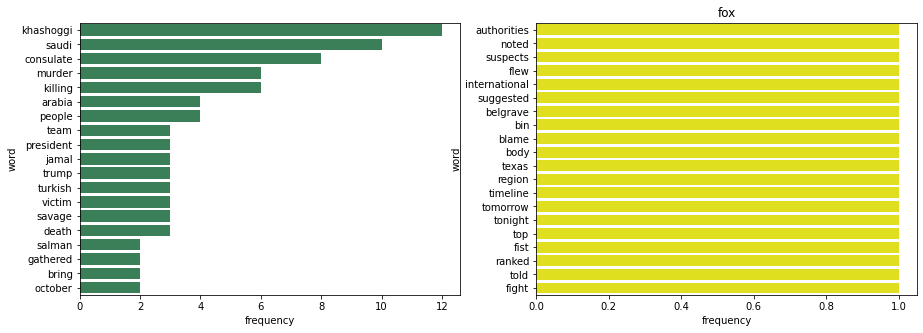

In [98]:
Top_20_wordcount('fox')

#### We run the above function for all media outlets data and note the important words (based on observation) for further analysis

### FREQUENCY OF IMPORTANT WORDS ACROSS ARTICLES

In [21]:
news_coverage = gen_DTM([aljazeera,bbc, breitbart, cnn, fox], ['aljazeera','bbc', 'breitbart', 'cnn', 'fox']) 
news_coverage.set_index('media_outlet', inplace = True)
news_coverage[['saudi', 'arabia', 'riyadh', 'istanbul', 'turkey', 'turkish', 'washington']]
# Filtering for frequency only on the noted imnportant words

<ipython-input-7-cd18f82dc2ce>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  DTM['media_outlet'] = media_list


,saudi,arabia,riyadh,istanbul,turkey,turkish,washington
media_outlet,,,,,,,
aljazeera,17,5,1.0,5,4,7,1.0
bbc,26,9,3.0,4,2,5,1.0
breitbart,9,1,0.0,4,1,6,1.0
cnn,4,4,2.0,4,4,2,1.0
fox,10,4,1.0,2,1,3,0.0


#### Aljazeera seems to have covered more on the Turkish president's remarks

In [22]:
news_coverage[['erdogan', 'trump', 'salman', 'crown', 'prince']]

,erdogan,trump,salman,crown,prince
media_outlet,,,,,
aljazeera,14,0.0,4.0,2.0,2.0
bbc,11,2.0,5.0,7.0,7.0
breitbart,4,4.0,5.0,3.0,3.0
cnn,6,0.0,0.0,0.0,0.0
fox,13,3.0,2.0,1.0,1.0


#### Though CNN has referred to Saudi Arabia in their article and noted Turkish president's remarks, looks like they haven't referred to or implicated the crown prince in their article.

In [23]:
news_coverage[['murder', 'killing', 'killed','planned']]

,murder,killing,killed,planned
media_outlet,,,,
aljazeera,6,5.0,1.0,2.0
bbc,6,7.0,3.0,1.0
breitbart,3,3.0,0.0,1.0
cnn,1,0.0,3.0,0.0
fox,6,6.0,1.0,2.0


#### Again, CNN stands out in not referring to the murder as 'planned'. However, this analyis could be inaccurate as we didn;t account for synonyms and as the important words were noted only on observation